<h1>Basic test of the wflow BMI interface

In [1]:
import wflow.wflow_bmi as bmi
import logging

reload(bmi)
%pylab inline 
import datetime
from IPython.html.widgets import interact

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Startup two models:

+ The wflow_sbm model calculates the runoff from each cell (the LA land-atmosphere model)
+ the wflow_routing model that uses a kinimatic wave for routing the flow (the RT routing model)

In [2]:
# This is the LAnd Atmophere (LA) model
LA_model = bmi.wflowbmi_csdms()
LA_model.initialize('../../examples/wflow_rhine_sbm/wflow_sbm_bmi.ini',loglevel=logging.ERROR)

# This is the routing (RT) model
RT_model = bmi.wflowbmi_csdms()
RT_model.initialize('../../examples/wflow_rhine_sbm/wflow_routing_bmi.ini',loglevel=logging.ERROR)

<h3>Now we can investigate some model parameters

In [3]:
print(LA_model.get_value("timestepsecs"))
print LA_model.get_start_time()

86400
631152000


In [4]:
aa = LA_model.get_attribute_names()

In [5]:
LA_model.get_attribute_value("run:reinit")

'0'

In [6]:
LA_model.set_attribute_value("run:reinit",'1')
LA_model.get_attribute_value("run:reinit")

'1'

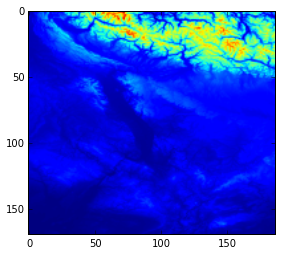

In [7]:
imshow(LA_model.get_value("Altitude"))

jabajab


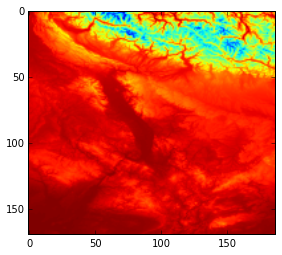

In [13]:

# Save the old dem, chnage the dem in the model and set it back
origdem = LA_model.get_value("Altitude")
newdem = origdem * 1.6
LA_model.set_value('Altitude',newdem)

diff = origdem - LA_model.get_value("Altitude")

imshow(diff)

In [ ]:
imshow(LA_model.get_value("FirstZoneDepth"))

In [ ]:
imshow(LA_model.get_value("River"))

<h3>Start and end times

In [ ]:
t_end = RT_model.get_end_time()
t_start = RT_model.get_start_time()
t = RT_model.get_current_time()

(t_end  - t_start)/(86400)


<h3>Now start the models

In [ ]:
t_end = RT_model.get_end_time()
t = RT_model.get_start_time()

res = []
resq = []

# Loop in time and put output of SBM in seperate routing module - 1way link
while t < t_end:
    LA_model.update()
    # Now set the output from the LA model (specific Q) as input to the RT model
    thevar = LA_model.get_value("InwaterMM")
    RT_model.set_value("IW",thevar) # The IW is set in the wflow_routing.ini var as a forcing
    RT_model.update()
    resq.append(RT_model.get_value("SurfaceRunoff"))
    res.append(thevar)
    t = RT_model.get_current_time()
    
    print datetime.datetime.fromtimestamp(t)


In [ ]:
LA_model.finalize()
RT_model.finalize()

<h4>Define function to view the results

In [ ]:
def browse_res(digits):
    n = len(digits)
    def view_image(i):
        plt.imshow(log(digits[i]+1))
        plt.title('Step: %d' % i)
        plt.colorbar()
        plt.show()
    interact(view_image, i=(0,n-1))

In [ ]:

browse_res(res)


In [ ]:
 browse_res(resq)